### General advice (delete this cell before submitting for review)

> * Remove the "**Sign up to the DEA Sandbox** to run this notebook interactively from a browser" header text if the notebook is not DEA Sandbox-compatible or if it is not synced to the DEA Sandbox (e.g. `Scientific_workflows` notebooks)
> * Update the **Compatibility** line depending on whether the notebook is compatible with the `NCI` and `DEA Sandbox` environments (e.g. "Notebook currently compatible with the `DEA Sandbox` environment only" or "Notebook currently compatible with the `NCI` environment only")
> * When adding **Products used**, embed the hyperlink to that specific product on the DEA Explorer using the `[product_name](product url)` syntax.
> * When writing in Markdown cells, start each sentence on a **new line**.
This makes it easy to see changes through git commits.
> * Use Australian English in markdown cells and code comments.
> * Check the [known issues](https://github.com/GeoscienceAustralia/dea-docs/wiki/Known-issues) for formatting regarding the conversion of notebooks to DEA docs using Sphinx.
Things to be aware of:
    * Sphinx is highly sensitive to bulleted lists:
        * Ensure that there is an empty line between any preceding text and the list
        * Only use the `*` bullet (`-` is not recognised)
        * Sublists must be indented by 4 spaces
    * Two kinds of formatting cannot be used simultaneously:
        * Hyperlinked code: \[\`code_format\`](hyperlink) fails
        * Bolded code: \*\*\`code_format\`\*\* fails
    * Headers must appear in heirachical order (`#`, `##`, `###`, `####`) and there can only be one title (`#`).
> * Use the [PEP8 standard](https://www.python.org/dev/peps/pep-0008/) for code. To make sure all code in the notebook is consistent, you can use the `jupyterlab_code_formatter` tool: select each code cell, then click `Edit` and then one of the `Apply X Formatter` options (`YAPF` or `Black` are recommended). This will reformat the code in the cell to a consistent style.
> * For additional guidance, refer to the style conventions and layouts in approved `develop` branch notebooks. 
Examples include
    * [Frequently_used_code/Using_load_ard.ipynb](./Frequently_used_code/Using_load_ard.ipynb)
    * [Real_world_examples/Coastal_erosion.ipynb](./Real_world_examples/Coastal_erosion.ipynb)
    * [Scripts/dea_datahandling.py](./Scripts/dea_datahandling.py)
> * In the final notebook cell, include a set of relevant tags which are used to build the DEA User Guide's [Tag Index](https://docs.dea.ga.gov.au/genindex.html). 
Use all lower-case (unless the tag is an acronym), separate words with spaces (unless it is the name of an imported module), and [re-use existing tags](https://github.com/GeoscienceAustralia/dea-notebooks/wiki/List-of-tags).
Ensure the tags cell below is in `Raw` format, rather than `Markdown` or `Code`.


# Introduction to DEA Land Cover <img align="right" src="../Supplementary_data/dea_logo.jpg">

* [**Sign up to the DEA Sandbox**](https://docs.dea.ga.gov.au/setup/sandbox.html) to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with both the `NCI` and `DEA Sandbox` environments
* **Products used:** 
[ga_ls_landcover_class_cyear_2](https://explorer.sandbox.dea.ga.gov.au/ga_ls_landcover_class_cyear_2)


## Background

Land cover is the observed physical cover on the Earth's surface, including trees, shrubs, grasses, soils, exposed rocks, water bodies, plantations, crops and built structures.
Australia's land cover is constantly changing in response to natural phenomena and human development.
Understanding how land cover responds to these pressures is crucial for monitoring and managing our environment. 


### What this product offers

[Digital Earth Australia Land Cover (DEA Land Cover)](link-to-maps) is a continental data set that maps  annual land cover classifications for Australia from 1988 to the present. The product combines satellite data and related data products from Geoscience Australia's Digital Earth Australia program.

The classification system used in DEA Land Cover is based on the Food and Agriculture of the United Nations [standard for land cover classification](https://www.fao.org/land-water/land/land-governance/land-resources-planning-toolbox/category/details/en/c/1036361/), allowing for comparison and integration with other national and international standardised datasets. 
The product defines six base land cover classes (`level3`), seven land cover descriptor classes, and a final land cover classification (`level4`) that combines both base and descriptor classes.
In-depth information about each class can be found on the [DEA Land Cover product details](https://cmi.ga.gov.au/data-products/dea/607/dea-land-cover-landsat#details) page.

DEA Land Cover allows users to quantify land cover trends and change over a range of spatial, temporal and thematic scales. 
Scientists, managers and policymakers can use these findings to support environmental management and development programs that benefit society, the environment and the economy.


### Applications

Annual land cover information can be used to monitor and manage Australia's environments. These include but are not limited to the following areas in environmental monitoring, the primary industries, and the interests and safety of the Australian community: 

* **Environmental monitoring:** ecosystem mapping, understanding surface water dynamics, erosion management 

* **Primary industries:** understanding crop responses to water availability, understanding and mitigating impact of drought, monitoring vegetation change

* **Community interests:** mapping urban expansion, mapping impacts of natural disasters, bushfire recovery 


### Publications
* Lucas R, Mueller N, Siggins A, Owers C, Clewley D, Bunting P, Kooymans C, Tissott B, Lewis B, Lymburner L, Metternicht G. (2019). Land Cover Mapping using Digital Earth Australia. <em>Data</em>, 4(4), 143. Available: https://doi.org/10.3390/data4040143

> **Note:** For more technical information about the DEA Coastlines product, visit the official Geoscience Australia [DEA Land Cover product description](https://cmi.ga.gov.au/data-products/dea/607/dea-land-cover-landsat) page.


## Description
This notebook will demonstrate how to load data from [DEA Land Cover](https://cmi.ga.gov.au/data-products/dea/607/dea-land-cover-landsat) using the Digital Earth Australia datacube. Topics covered include:

1. Inspecting the products and measurements available in the datacube
2. Loading DEA Land Cover data for an area of interest
3. Understanding the land cover classifications and descriptor layers
4. Plotting DEA Land Cover


....Anything else cool I can think of once this is done!!
***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Load key Python packages and supporting functions for the analysis.


In [1]:
%matplotlib inline

import datacube
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import sys
sys.path.insert(1, '../Tools/')
from dea_tools.plotting import rgb
from dea_tools.plotting import rgb, display_map
from matplotlib import colors as mcolours

### Connect to the datacube

Connect the datacube database, which provides functionality for loading and displaying stored Earth observation data.

In [2]:
dc = datacube.Datacube(app='DEA_Land_Cover')

### List measurements
We can inspect the contents of DEA Land Cover using datacube's `list_measurements` function.

The table generated in the following cell lists each of the measurements available in DEA Land Cover. 
There are two levels of land cover classification, `level3` and `level4`, and seven land cover descriptors that feed into the `level4` classification.

In [3]:
product = "ga_ls_landcover_class_cyear_2"

measurements = dc.list_measurements()
measurements.loc[product]

,name,dtype,units,nodata,aliases,flags_definition,spectral_definition
measurement,,,,,,,
level3,level3,uint8,1,0,NaN,NaN,NaN
lifeform_veg_cat_l4a,lifeform_veg_cat_l4a,int8,1,0,[lifeform],NaN,NaN
canopyco_veg_cat_l4d,canopyco_veg_cat_l4d,int8,1,0,[vegetation_cover],NaN,NaN
watersea_veg_cat_l4a_au,watersea_veg_cat_l4a_au,int8,1,0,[water_seasonality],NaN,NaN
waterstt_wat_cat_l4a,waterstt_wat_cat_l4a,int8,1,0,[water_state],NaN,NaN
inttidal_wat_cat_l4a,inttidal_wat_cat_l4a,int8,1,0,[intertidal],NaN,NaN
waterper_wat_cat_l4d_au,waterper_wat_cat_l4d_au,int8,1,0,[water_persistence],NaN,NaN
baregrad_phy_cat_l4d_au,baregrad_phy_cat_l4d_au,int8,1,0,[bare_gradation],NaN,NaN
level4,level4,int8,1,0,[full_classification],NaN,NaN


## Select and view your study area

**If running the notebook for the first time,** keep the default settings below.
This will demonstrate how the analysis works and provide meaningful results.
The example generates land cover data for Broome, Western Australia.

In [18]:
# # Define area of interest and buffer values 
# lat = -18.10
# lon = 122.32
# lat_buffer = 0.18
# lon_buffer = 0.15

# # Combine central coordinates with buffer to get area of intest 
# lat_range = (lat - lat_buffer, lat + lat_buffer)
# lon_range = (lon - lon_buffer, lon + lon_buffer)

# Broome
lon_range = (-1040000, -1000000)
lat_range = (-1950000, -1990000)

# Set the range of dates for the analysis
time_range = ('2017', '2020')

The next cell will display the selected area on an interactive map.
Feel free to zoom in and out to get a better understanding of the area you'll be analysing.
Clicking on any point of the map will reveal the latitude and longitude coordinates of that point.

In [5]:
display_map(x=lon_range, y=lat_range)

## Load and view DEA Land Cover data 
The first step in this analysis is to load data for the `lat_range`, `lon_range` and `time_range` we provided above.
In the following cell we have listed all available measurements, however the below query can adapted to only load layers of interest.

In [21]:
# Create the 'query' dictionary object, which contains the longitudes, latitudes and time defined above.
query = {
    'y': lat_range,
    'x': lon_range,
    'time': time_range,
}

# Load DEA Land Cover data from the datacube
lc = dc.load(product='ga_ls_landcover_class_cyear_2',
             crs = "EPSG:3577",
             output_crs='EPSG:3577',
             measurements=['level3', 'lifeform_veg_cat_l4a', 'canopyco_veg_cat_l4d', 'watersea_veg_cat_l4a_au',
                           'waterstt_wat_cat_l4a', 'inttidal_wat_cat_l4a', 'waterper_wat_cat_l4d_au', 
                           'baregrad_phy_cat_l4d_au', 'level4'],
             resolution=(25, -25),
             **query)


We can now view the data that we loaded. 
The measurements listed under `Data variables` should match the measurements listed in the query above.

In [7]:
lc

<xarray.Dataset>
Dimensions:                  (time: 4, y: 1687, x: 1387)
Coordinates:
  * time                     (time) datetime64[ns] 2017-01-01 ... 2020-01-01
  * y                        (y) float64 -1.993e+06 -1.993e+06 ... -1.951e+06
  * x                        (x) float64 -1.006e+06 -1.006e+06 ... -1.041e+06
    spatial_ref              int32 3577
Data variables:
    level3                   (time, y, x) uint8 112 112 112 112 ... 220 220 220
    lifeform_veg_cat_l4a     (time, y, x) int8 2 2 2 2 2 2 2 2 ... 0 0 0 0 0 0 0
    canopyco_veg_cat_l4d     (time, y, x) int8 13 13 13 13 13 13 ... 0 0 0 0 0 0
    watersea_veg_cat_l4a_au  (time, y, x) int8 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    waterstt_wat_cat_l4a     (time, y, x) int8 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1
    inttidal_wat_cat_l4a     (time, y, x) int8 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    waterper_wat_cat_l4d_au  (time, y, x) int8 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1
    baregrad_phy_cat_l4d_au  (time, y, x) int8 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    level4                   (time, y, x) int8 34 34 34 34 ... 101 101 101 101
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

## Plotting data

Being categorical data, each of the variables is best visualised with custom colour schemes. 
The below function `plot_layer` will create a categorical colour map for the provided dictionary and use it visualise specified data. 

In [10]:
# Plot layer from colour map
def plot_layer(colours, data):
    colour_arr = []
    cblabels = []
    for key, value in colours.items():
        colour_arr.append(np.array(value[:-2])/255)
        cblabels.append(value[-1])

    cmap = mcolours.ListedColormap(colour_arr)
    bounds = list(colours)
    bounds.append(255)
    norm = mcolours.BoundaryNorm(np.array(bounds) - 0.1, cmap.N)

    # plot the provided layer
    im = data.plot(cmap=cmap, norm=norm, add_colorbar=True, col='time', col_wrap=4, size=8)

    cb = im.cbar
    ticks = cb.get_ticks()
    cb.set_ticks(ticks + np.diff(ticks, append=256) / 2)
    cb.set_ticklabels(cblabels)    
    
    return im

### Level 3 visualisation

The keys in the below dictionary are the classification values for `level3`, and the following values consists of colour specifications (red, green, blue, alpha) for each class as well as a description to be used in the legend.

In [11]:
# Define a colour scheme for the level3 layer
LEVEL3_COLOUR_SCHEME = { 0   : (255, 255, 255, 255, "No Data"),
                         111 : (172, 188, 45, 255, "Cultivated Terrestrial Vegetation"),
                         112 : (14, 121, 18, 255, "Natural Terrestrial Vegetation"),
                         124 : (30, 191, 121, 255, "Natural Aquatic Vegetation"),
                         215 : (218, 92, 105, 255, "Artificial Surface"),
                         216 : (243, 171, 105, 255, "Natural Bare Surface"),
                         220 : (77, 159, 220, 255, "Water")}

The cell below plots the `level3` classification data using the above colour specification and the `plot_layer` function. 

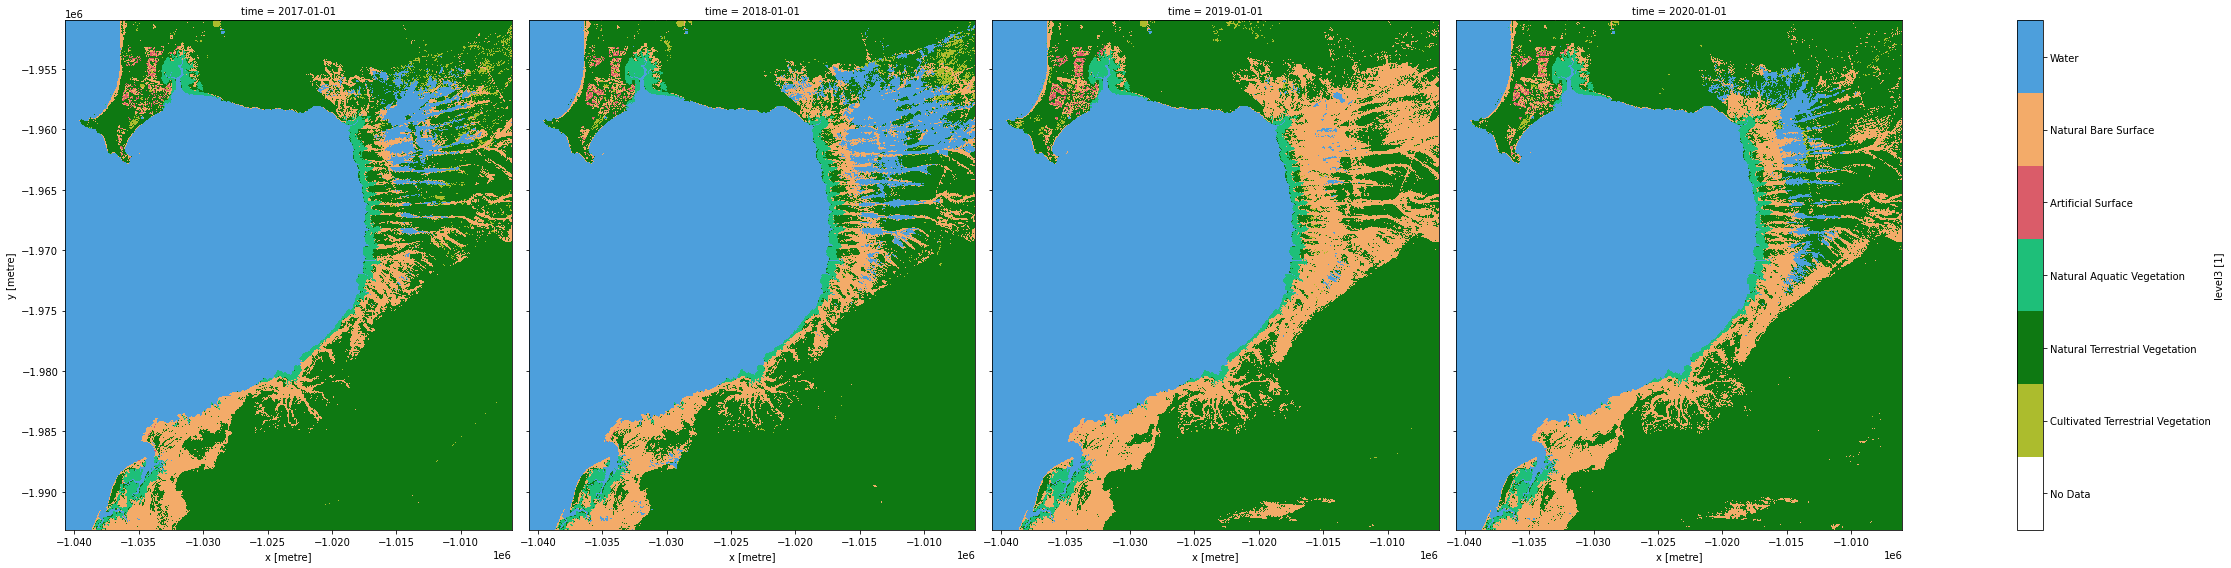

In [12]:
plot_layer(LEVEL3_COLOUR_SCHEME, lc.level3)

### Visualising Level 4 descriptor classes 

As above, to plot a class we first need to define a colour scheme for the variable we're wanting to visualise, then use the `plot_layer` function. 

To visualise each descriptor class, use the code below to comment in/out one or more colour schemes and plot functions of classes of interest.

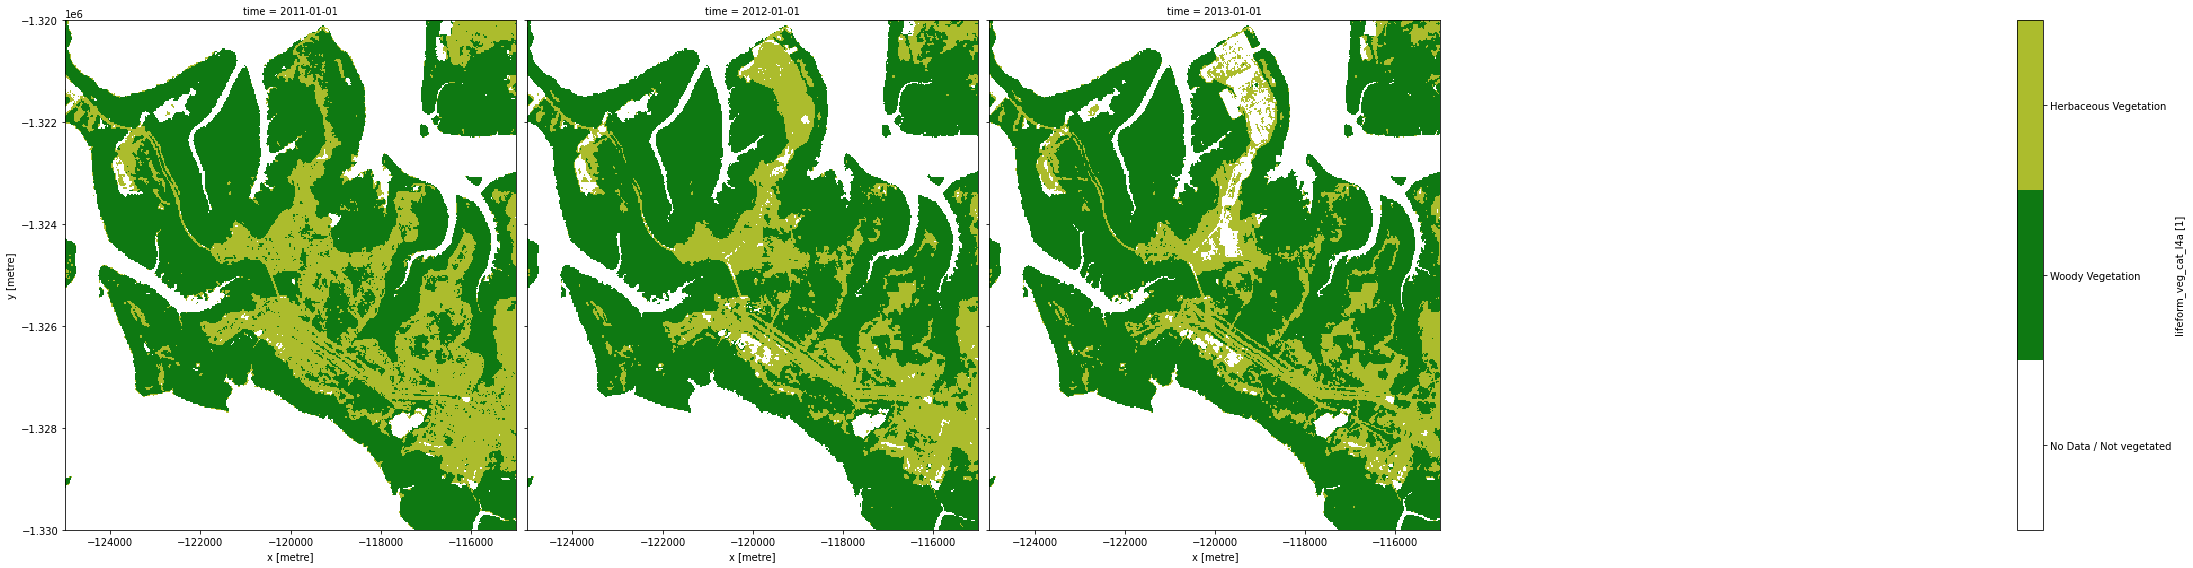

In [70]:
# LIFEFORM VISUALISATION 
LIFEFORM_COLOUR_SCHEME = { 0 : (255, 255, 255, 255, "No Data / Not vegetated"),
                           1 : (14, 121, 18, 255, "Woody Vegetation"),
                           2 : (172, 188, 45, 255, "Herbaceous Vegetation")}
plot_layer(LIFEFORM_COLOUR_SCHEME, lc.lifeform_veg_cat_l4a)



# # VEGETATION COVER VISUALISATION 
# COVER_COLOUR_SCHEME =  { 0  : (255, 255, 255, 255, "No Data / Not vegetated"),
#                          10 : (14,  121, 18,  255, "> 65 % cover"),
#                          12 : (45,  141, 47,  255, "40 to 65 % cover"),
#                          13 : (80,  160, 82,  255, "15 to 40 % cover"),
#                          15 : (117, 180, 118, 255, "4 to 15 % cover"),
#                          16 : (154, 199, 156, 255, "1 to 4 % cover")}
# plot_layer(COVER_COLOUR_SCHEME, lc.canopyco_veg_cat_l4d)



# # WATER SEASONALITY VISUALISATION 
# WATERSEA_COLOUR_SCHEME =  { 0 : (255, 255, 255, 255, "No Data / Not aquatic veg"), 
#                             1 : (25,  173, 109, 255, "> 3 months"),
#                             2 : (176, 218, 201, 255, "< 3 months")
#                           }
# plot_layer(WATERSEA_COLOUR_SCHEME, lc.watersea_veg_cat_l4a_au)

# # As water seasonlity only relates to wet vegetation, it's hard to see the seasonality changes at this scale. 
# # We can easily 'zoom in' a little.
# plot_layer(WATERSEA_COLOUR_SCHEME, lc.watersea_veg_cat_l4a_au[:,1250:1500,1150:1400])



# # WATER STATE VISUALISATION 
# WATERSTT_COLOUR_SCHEME =  { 0 : (255, 255, 255, 255, "No Data / Not water"), 
#                             1 : (77, 159, 220, 255, "water"),
#                           }
# plot_layer(WATERSTT_COLOUR_SCHEME, lc.waterstt_wat_cat_l4a)



# # INTERTITAL VISUALISATION 
# INTTIDAL_COLOUR_SCHEME =  { 0 : (255, 255, 255, 255, "No Data / Not intertidail"), 
#                             3 : (77, 159, 220, 255, "intertidal"),
#                           }
# plot_layer(INTTIDAL_COLOUR_SCHEME, lc.inttidal_wat_cat_l4a)



# # WATER PERSISTENCE VISUALISATION 
# WATERPER_COLOUR_SCHEME =  { 0 : (255, 255, 255, 255, "No Data / Not water"), 
#                             1 : (27,  85,  186, 255, "> 9 months"),
#                             7 : (52,  121, 201, 255, "7 to 9 months"),
#                             8 : (79,  157, 217, 255, "4 to 6 months"),
#                             9 : (113, 202, 253, 255, "1 to 3 months")
#                           }
# plot_layer(WATERPER_COLOUR_SCHEME, lc.waterper_wat_cat_l4d_au)



# # BARE GRADATION VISUALISATION 
# BAREGRAD_COLOUR_SCHEME =  { 0 : (255, 255, 255, 255, "No Data / Not bare"), 
#                             10 : (255, 230, 140, 255, "Sparsely Vegetated"),
#                             12 : (250, 210, 110, 255, "Very Sparsely Vegetated"),
#                             15 : (243, 171, 105, 255, "Bare Areas, Unvegetated")
#                           }
# plot_layer(BAREGRAD_COLOUR_SCHEME, lc.baregrad_phy_cat_l4d_au)

### Level 4 visualisation

As above, the next two cells define a colour scheme for the `level4` classification, then use the `plot_layer` function to visualise the classification. 

In [35]:
LEVEL4_COLOUR_SCHEME = {
1 : (151, 187, 26, 255, 'Cultivated Terrestrial Vegetated:' ),
2 : (151, 187, 26, 255, 'Cultivated Terrestrial Vegetated: Woody' ),
3 : (209, 224, 51, 255, 'Cultivated Terrestrial Vegetated: Herbaceous' ),
4 : (197, 168, 71, 255, 'Cultivated Terrestrial Vegetated: Closed (> 65 %)' ),
5 : (205, 181, 75, 255, 'Cultivated Terrestrial Vegetated: Open (40 to 65 %)' ),
6 : (213, 193, 79, 255, 'Cultivated Terrestrial Vegetated: Open (15 to 40 %)' ),
7 : (228, 210, 108, 255, 'Cultivated Terrestrial Vegetated: Sparse (4 to 15 %)' ),
8 : (242, 227, 138, 255, 'Cultivated Terrestrial Vegetated: Scattered (1 to 4 %)' ),
9 : (197, 168, 71, 255, 'Cultivated Terrestrial Vegetated: Woody Closed (> 65 %)' ),
10 : (205, 181, 75, 255, 'Cultivated Terrestrial Vegetated: Woody Open (40 to 65 %)' ),
11 : (213, 193, 79, 255, 'Cultivated Terrestrial Vegetated: Woody Open (15 to 40 %)' ),
12 : (228, 210, 108, 255, 'Cultivated Terrestrial Vegetated: Woody Sparse (4 to 15 %)' ),
13 : (242, 227, 138, 255, 'Cultivated Terrestrial Vegetated: Woody Scattered (1 to 4 %)' ),
14 : (228, 224, 52, 255, 'Cultivated Terrestrial Vegetated: Herbaceous Closed (> 65 %)' ),
15 : (235, 232, 84, 255, 'Cultivated Terrestrial Vegetated: Herbaceous Open (40 to 65 %)' ),
16 : (242, 240, 127, 255, 'Cultivated Terrestrial Vegetated: Herbaceous Open (15 to 40 %)' ),
17 : (249, 247, 174, 255, 'Cultivated Terrestrial Vegetated: Herbaceous Sparse (4 to 15 %)' ),
18 : (255, 254, 222, 255, 'Cultivated Terrestrial Vegetated: Herbaceous Scattered (1 to 4 %)' ),
19 : (14, 121, 18, 255, 'Natural Terrestrial Vegetated:' ),
20 : (26, 177, 87, 255, 'Natural Terrestrial Vegetated: Woody' ),
21 : (94, 179, 31, 255, 'Natural Terrestrial Vegetated: Herbaceous' ),
22 : (14, 121, 18, 255, 'Natural Terrestrial Vegetated: Closed (> 65 %)' ),
23 : (45, 141, 47, 255, 'Natural Terrestrial Vegetated: Open (40 to 65 %)' ),
24 : (80, 160, 82, 255, 'Natural Terrestrial Vegetated: Open (15 to 40 %)' ),
25 : (117, 180, 118, 255, 'Natural Terrestrial Vegetated: Sparse (4 to 15 %)' ),
26 : (154, 199, 156, 255, 'Natural Terrestrial Vegetated: Scattered (1 to 4 %)' ),
27 : (14, 121, 18, 255, 'Natural Terrestrial Vegetated: Woody Closed (> 65 %)' ),
28 : (45, 141, 47, 255, 'Natural Terrestrial Vegetated: Woody Open (40 to 65 %)' ),
29 : (80, 160, 82, 255, 'Natural Terrestrial Vegetated: Woody Open (15 to 40 %)' ),
30 : (117, 180, 118, 255, 'Natural Terrestrial Vegetated: Woody Sparse (4 to 15 %)' ),
31 : (154, 199, 156, 255, 'Natural Terrestrial Vegetated: Woody Scattered (1 to 4 %)' ),
32 : (119, 167, 30, 255, 'Natural Terrestrial Vegetated: Herbaceous Closed (> 65 %)' ),
33 : (136, 182, 51, 255, 'Natural Terrestrial Vegetated: Herbaceous Open (40 to 65 %)' ),
34 : (153, 196, 80, 255, 'Natural Terrestrial Vegetated: Herbaceous Open (15 to 40 %)' ),
35 : (170, 212, 113, 255, 'Natural Terrestrial Vegetated: Herbaceous Sparse (4 to 15 %)' ),
36 : (186, 226, 146, 255, 'Natural Terrestrial Vegetated: Herbaceous Scattered (1 to 4 %)' ),
37 : (86, 236, 231, 255, 'Cultivated Aquatic Vegetated:' ),
38 : (61, 170, 140, 255, 'Cultivated Aquatic Vegetated: Woody' ),
39 : (82, 231, 172, 255, 'Cultivated Aquatic Vegetated: Herbaceous' ),
40 : (43, 210, 203, 255, 'Cultivated Aquatic Vegetated: Closed (> 65 %)' ),
41 : (73, 222, 216, 255, 'Cultivated Aquatic Vegetated: Open (40 to 65 %)' ),
42 : (110, 233, 228, 255, 'Cultivated Aquatic Vegetated: Open (15 to 40 %)' ),
43 : (149, 244, 240, 255, 'Cultivated Aquatic Vegetated: Sparse (4 to 15 %)' ),
44 : (187, 255, 252, 255, 'Cultivated Aquatic Vegetated: Scattered (1 to 4 %)' ),
45 : (43, 210, 203, 255, 'Cultivated Aquatic Vegetated: Woody Closed (> 65 %)' ),
46 : (73, 222, 216, 255, 'Cultivated Aquatic Vegetated: Woody Open (40 to 65 %)' ),
47 : (110, 233, 228, 255, 'Cultivated Aquatic Vegetated: Woody Open (15 to 40 %)' ),
48 : (149, 244, 240, 255, 'Cultivated Aquatic Vegetated: Woody Sparse (4 to 15 %)' ),
49 : (187, 255, 252, 255, 'Cultivated Aquatic Vegetated: Woody Scattered (1 to 4 %)' ),
50 : (82, 231, 196, 255, 'Cultivated Aquatic Vegetated: Herbaceous Closed (> 65 %)' ),
51 : (113, 237, 208, 255, 'Cultivated Aquatic Vegetated: Herbaceous Open (40 to 65 %)' ),
52 : (144, 243, 220, 255, 'Cultivated Aquatic Vegetated: Herbaceous Open (15 to 40 %)' ),
53 : (175, 249, 232, 255, 'Cultivated Aquatic Vegetated: Herbaceous Sparse (4 to 15 %)' ),
54 : (207, 255, 244, 255, 'Cultivated Aquatic Vegetated: Herbaceous Scattered (1 to 4 %)' ),
55 : (30, 191, 121, 255, 'Natural Aquatic Vegetated:' ),
56 : (18, 142, 148, 255, 'Natural Aquatic Vegetated: Woody' ),
57 : (112, 234, 134, 255, 'Natural Aquatic Vegetated: Herbaceous' ),
58 : (25, 173, 109, 255, 'Natural Aquatic Vegetated: Closed (> 65 %)' ),
59 : (53, 184, 132, 255, 'Natural Aquatic Vegetated: Open (40 to 65 %)' ),
60 : (93, 195, 155, 255, 'Natural Aquatic Vegetated: Open (15 to 40 %)' ),
61 : (135, 206, 178, 255, 'Natural Aquatic Vegetated: Sparse (4 to 15 %)' ),
62 : (176, 218, 201, 255, 'Natural Aquatic Vegetated: Scattered (1 to 4 %)' ),
63 : (25, 173, 109, 255, 'Natural Aquatic Vegetated: Woody Closed (> 65 %)' ),
64 : (25, 173, 109, 255, 'Natural Aquatic Vegetated: Woody Closed (> 65 %) Water > 3 months (semi-) permenant' ),
65 : (25, 173, 109, 255, 'Natural Aquatic Vegetated: Woody Closed (> 65 %) Water < 3 months (temporary or seasonal)' ),
66 : (53, 184, 132, 255, 'Natural Aquatic Vegetated: Woody Open (40 to 65 %)' ),
67 : (53, 184, 132, 255, 'Natural Aquatic Vegetated: Woody Open (40 to 65 %) Water > 3 months (semi-) permenant' ),
68 : (53, 184, 132, 255, 'Natural Aquatic Vegetated: Woody Open (40 to 65 %) Water < 3 months (temporary or seasonal)' ),
69 : (93, 195, 155, 255, 'Natural Aquatic Vegetated: Woody Open (15 to 40 %)' ),
70 : (93, 195, 155, 255, 'Natural Aquatic Vegetated: Woody Open (15 to 40 %) Water > 3 months (semi-) permenant' ),
71 : (93, 195, 155, 255, 'Natural Aquatic Vegetated: Woody Open (15 to 40 %) Water < 3 months (temporary or seasonal)' ),
72 : (135, 206, 178, 255, 'Natural Aquatic Vegetated: Woody Sparse (4 to 15 %)' ),
73 : (135, 206, 178, 255, 'Natural Aquatic Vegetated: Woody Sparse (4 to 15 %) Water > 3 months (semi-) permenant' ),
74 : (135, 206, 178, 255, 'Natural Aquatic Vegetated: Woody Sparse (4 to 15 %) Water < 3 months (temporary or seasonal)' ),
75 : (176, 218, 201, 255, 'Natural Aquatic Vegetated: Woody Scattered (1 to 4 %)' ),
76 : (176, 218, 201, 255, 'Natural Aquatic Vegetated: Woody Scattered (1 to 4 %) Water > 3 months (semi-) permenant' ),
77 : (176, 218, 201, 255, 'Natural Aquatic Vegetated: Woody Scattered (1 to 4 %) Water < 3 months (temporary or seasonal)' ),
78 : (39, 204, 139, 255, 'Natural Aquatic Vegetated: Herbaceous Closed (> 65 %)' ),
79 : (39, 204, 139, 255, 'Natural Aquatic Vegetated: Herbaceous Closed (> 65 %) Water > 3 months (semi-) permenant' ),
80 : (39, 204, 139, 255, 'Natural Aquatic Vegetated: Herbaceous Closed (> 65 %) Water < 3 months (temporary or seasonal)' ),
81 : (66, 216, 159, 255, 'Natural Aquatic Vegetated: Herbaceous Open (40 to 65 %)' ),
82 : (66, 216, 159, 255, 'Natural Aquatic Vegetated: Herbaceous Open (40 to 65 %) Water > 3 months (semi-) permenant' ),
83 : (66, 216, 159, 255, 'Natural Aquatic Vegetated: Herbaceous Open (40 to 65 %) Water < 3 months (temporary or seasonal)' ),
84 : (99, 227, 180, 255, 'Natural Aquatic Vegetated: Herbaceous Open (15 to 40 %)' ),
85 : (99, 227, 180, 255, 'Natural Aquatic Vegetated: Herbaceous Open (15 to 40 %) Water > 3 months (semi-) permenant' ),
86 : (99, 227, 180, 255, 'Natural Aquatic Vegetated: Herbaceous Open (15 to 40 %) Water < 3 months (temporary or seasonal)' ),
87 : (135, 239, 201, 255, 'Natural Aquatic Vegetated: Herbaceous Sparse (4 to 15 %)' ),
88 : (135, 239, 201, 255, 'Natural Aquatic Vegetated: Herbaceous Sparse (4 to 15 %) Water > 3 months (semi-) permenant' ),
89 : (135, 239, 201, 255, 'Natural Aquatic Vegetated: Herbaceous Sparse (4 to 15 %) Water < 3 months (temporary or seasonal)' ),
90 : (171, 250, 221, 255, 'Natural Aquatic Vegetated: Herbaceous Scattered (1 to 4 %)' ),
91 : (171, 250, 221, 255, 'Natural Aquatic Vegetated: Herbaceous Scattered (1 to 4 %) Water > 3 months (semi-) permenant' ),
92 : (171, 250, 221, 255, 'Natural Aquatic Vegetated: Herbaceous Scattered (1 to 4 %) Water < 3 months (temporary or seasonal)' ),
93 : (218, 92, 105, 255, 'Artificial Surface:' ),
94 : (243, 171, 105, 255, 'Natural Surface:' ),
95 : (255, 230, 140, 255, 'Natural Surface: Sparsely vegetated' ),
96 : (250, 210, 110, 255, 'Natural Surface: Very sparsely vegetated' ),
97 : (243, 171, 105, 255, 'Natural Surface: Bare areas, unvegetated' ),
98 : (77, 159, 220, 255, 'Water:' ),
99 : (77, 159, 220, 255, 'Water: (Water)' ),
100 : (187, 220, 233, 255, 'Water: (Water) Tidal area' ),
101 : (27, 85, 186, 255, 'Water: (Water) Perennial (> 9 months)' ),
102 : (52, 121, 201, 255, 'Water: (Water) Non-perennial (7 to 9 months)' ),
103 : (79, 157, 217, 255, 'Water: (Water) Non-perennial (4 to 6 months)' ),
104 : (133, 202, 253, 255, 'Water: (Water) Non-perennial (1 to 3 months)' ),
105 : (250, 250, 250, 255, 'Water: (Snow)' )}

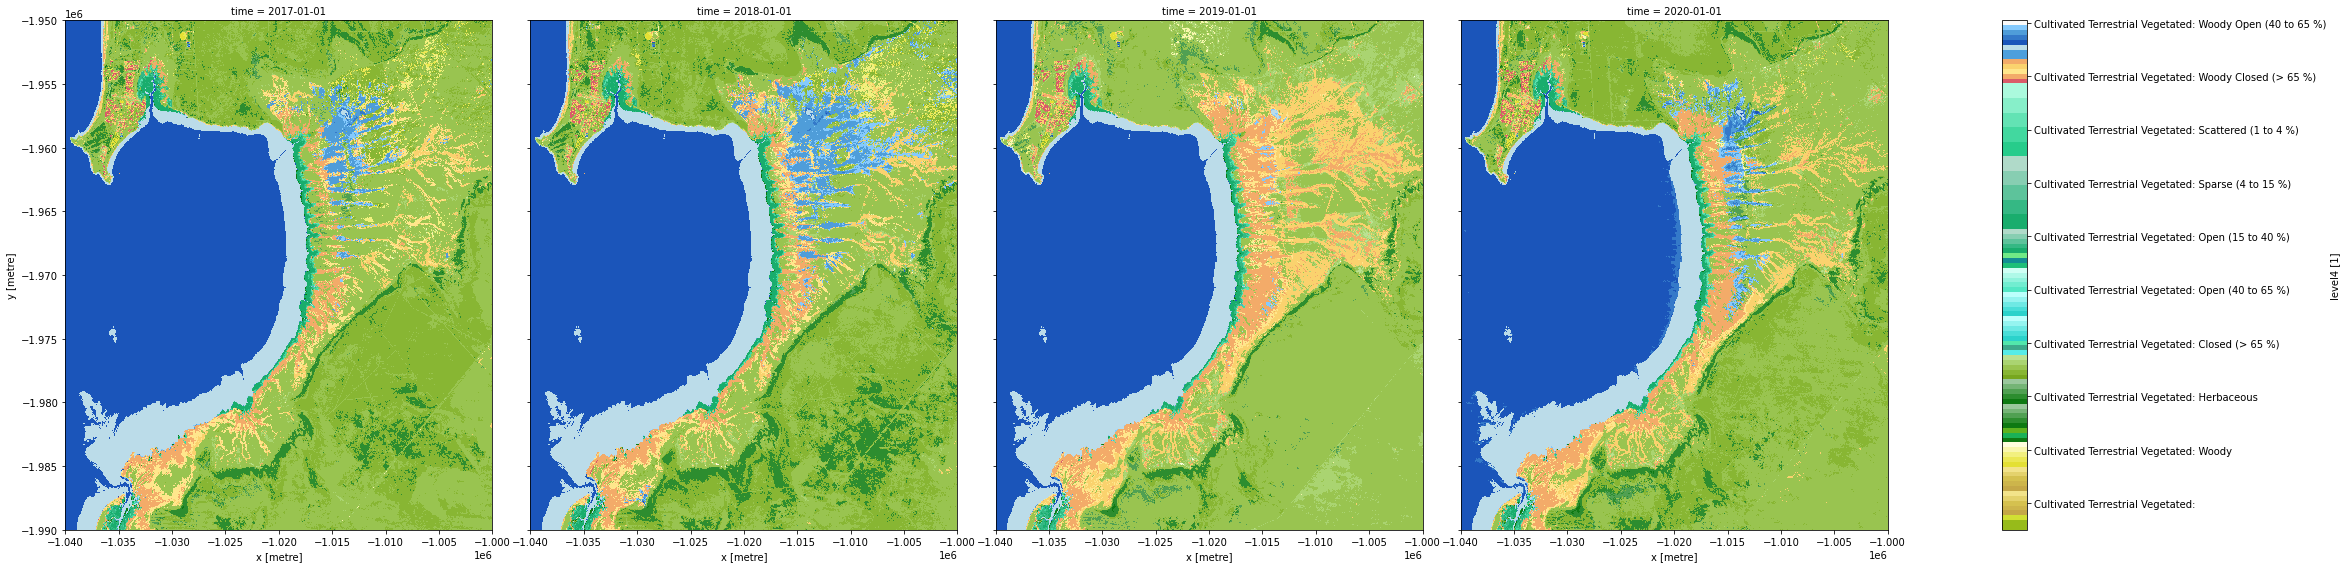

In [36]:
plot_layer(LEVEL4_COLOUR_SCHEME, lc.level4)

## Change mapping



DEA Land Cover can be used to measure the level of change over time. 

The following example looks at vegetation change mapping in Port Lincoln, South Australia.
The below cell defines the area of interest, and loads the data from the datacube. 

In [38]:
# Set up a region to load data

# port lincoln
x = (-125000, -115000)
y = (-1330000, -1320000)

query = {
    'y': y,
    'x': x,
    'time': ('2011', '2013'),
}

# Load DEA Land Cover data from the datacube
lc = dc.load(product='ga_ls_landcover_class_cyear_2',
             crs = "EPSG:3577",
             output_crs='EPSG:3577',
             measurements=['level3', 'lifeform_veg_cat_l4a', 'canopyco_veg_cat_l4d'],
             resolution=(25, -25),
             **query)

The below cell plots the `level3` classification data loaded above.

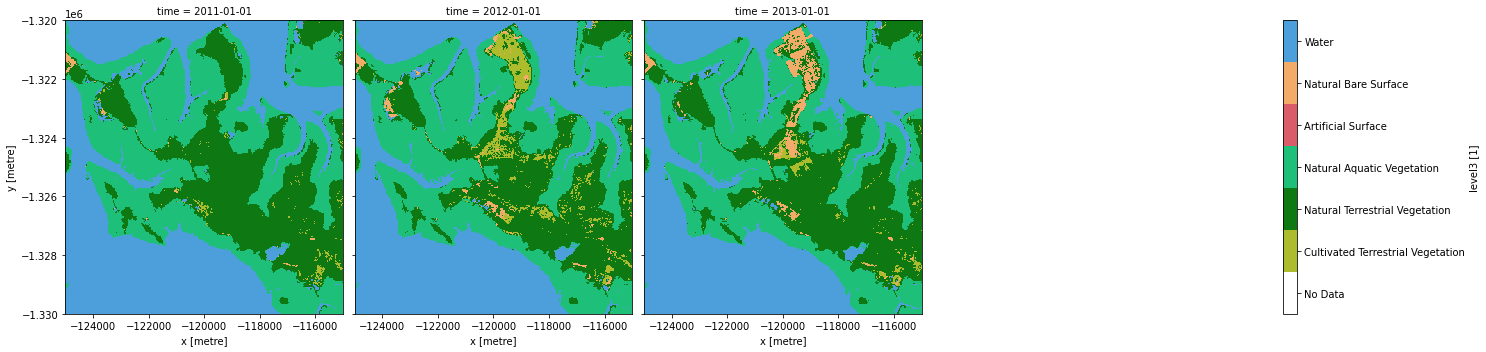

In [57]:
plot_layer(LEVEL3_COLOUR_SCHEME, lc.level3)

The below cell plots the `lifeform_veg_cat_l4a` classification data.

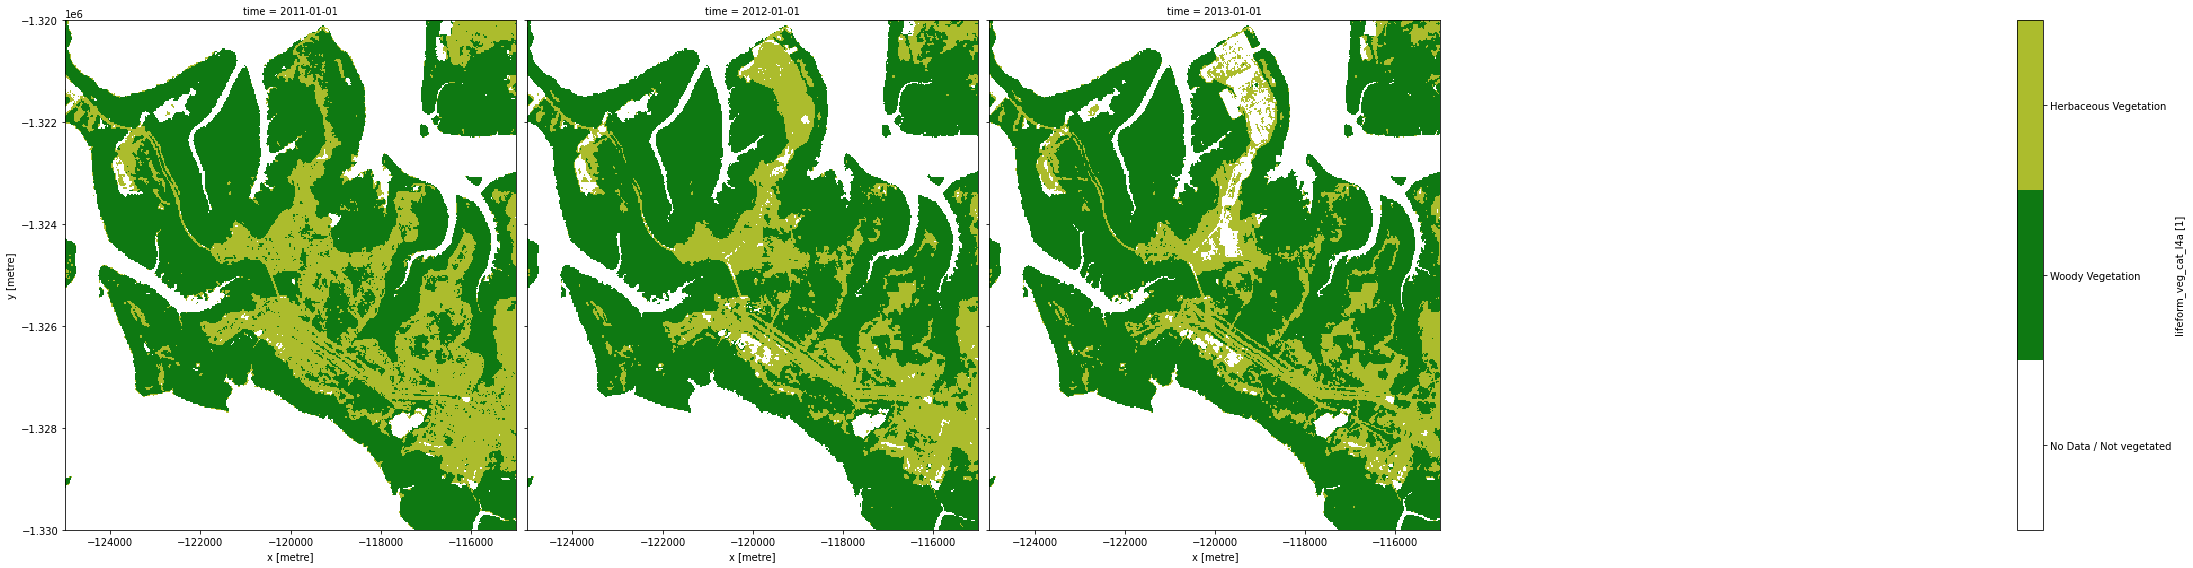

In [39]:
plot_layer(LIFEFORM_COLOUR_SCHEME, lc.lifeform_veg_cat_l4a)

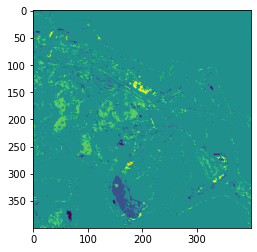

In [56]:
plt.imshow(lc.lifeform_veg_cat_l4a[0] - lc.lifeform_veg_cat_l4a[1])

#is this one upside down or is my one upside down?? 

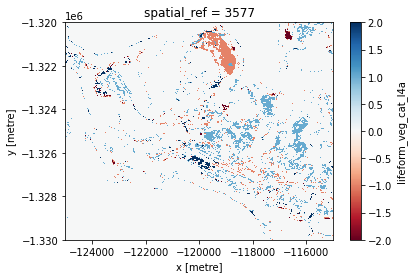

In [64]:
diff = lc.lifeform_veg_cat_l4a[0] - lc.lifeform_veg_cat_l4a[1]

diff.plot(cmap='RdBu')




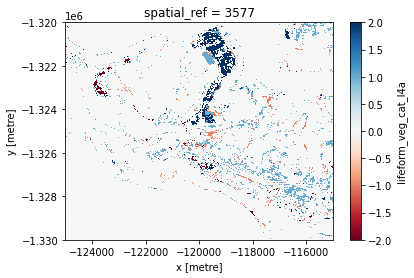

In [68]:
diff = lc.lifeform_veg_cat_l4a[1] - lc.lifeform_veg_cat_l4a[2]

diff.plot(cmap='RdBu')




***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** December 2021

**Compatible datacube version:** 

In [ ]:
print(datacube.__version__)

## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)